# Bag of Words para Spam/Ham

In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
import os
import numpy as np
import csv
import string
import requests
import io
from zipfile import ZipFile
from tensorflow.contrib import learn

In [2]:
save_file_name = os.path.join('..','..','datasets', 'spam_data.csv')
if os.path.isfile(save_file_name):
    #el fichero existe y solo hay que cargarlo
    text_data = []
    with open(save_file_name, 'r') as temp_output_file:
        reader = csv.reader(temp_output_file)
        for row in reader:
            text_data.append(row)
else: 
    ##el fichero no existe y debemos descargarlo
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip"
    req = requests.get(url)
    z = ZipFile(io.BytesIO(req.content))
    file = z.read('SMSSpamCollection')
    ##Transformar el fichero binario a texto
    text_data = file.decode()
    text_data = text_data.encode('ascii', errors='ignore')
    text_data = text_data.decode().split('\n')
    text_data = [x.split('\t') for x in text_data if len(x)>=1]
    ##Guardar datos en CSV
    with open(save_file_name, 'w') as temp_output_file:
        writer = csv.writer(temp_output_file)
        writer.writerows(text_data)

In [3]:
text_data

[['ham',
  'Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'],
 ['ham', 'Ok lar... Joking wif u oni...'],
 ['spam',
  "Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"],
 ['ham', 'U dun say so early hor... U c already then say...'],
 ['ham', "Nah I don't think he goes to usf, he lives around here though"],
 ['spam',
  "FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, 1.50 to rcv"],
 ['ham',
  'Even my brother is not like to speak with me. They treat me like aids patent.'],
 ['ham',
  "As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune"],
 ['spam',
  'WINNER!! As a valued network customer you have been selected to receivea 90

In [5]:
texts = [x[1] for x in text_data]
target = [x[0] for x in text_data]
target = [1 if x == 'spam' else 0 for x in target]

In [6]:
target

[0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,


In [25]:
texts = [x.lower() for x in texts] # Convertir los textos a minúscula
texts = [''.join(c for c in x if c not in string.punctuation) for x in texts] # Eliminamos signos de puntuación
texts = [''.join(c for c in x if c not in '0123456789') for x in texts] # Eliminamos los números
texts = [' '.join(x.split()) for x in texts] # Eliminar espacios en blanco y separadores extras

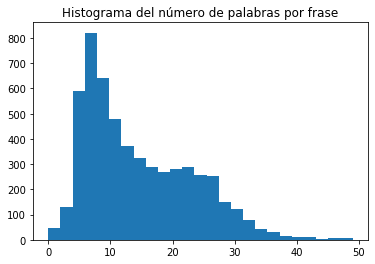

In [26]:
texts_lengths = [len(x.split()) for x in texts]
texts_lengths = [x for x in texts_lengths if x < 50]
plt.hist(texts_lengths, bins=25)
plt.title("Histograma del número de palabras por frase")
plt.show()

In [27]:
sentence_size = 40
min_word_freq = 3

In [28]:
vocab_processor = learn.preprocessing.VocabularyProcessor(sentence_size, min_frequency=min_word_freq)
vocab_processor.fit_transform(texts)
transformed_texts = np.array([x for x in vocab_processor.transform(texts)])
embedding_size = len(np.unique(transformed_texts))

In [29]:
embedding_size

2108

In [30]:
transformed_texts

array([[  44,  455,    0, ...,    0,    0,    0],
       [  47,  315, 1440, ...,    0,    0,    0],
       [  46,  465,    9, ...,    0,    0,    0],
       ...,
       [   0,   59,    9, ...,    0,    0,    0],
       [   5,  493,  108, ...,    0,    0,    0],
       [   0,   40,  474, ...,    0,    0,    0]], dtype=int64)

In [31]:
texts

['go until jurong point crazy available only in bugis n great world la e buffet cine there got amore wat',
 'ok lar joking wif u oni',
 'free entry in a wkly comp to win fa cup final tkts st may text fa to to receive entry questionstd txt ratetcs apply overs',
 'u dun say so early hor u c already then say',
 'nah i dont think he goes to usf he lives around here though',
 'freemsg hey there darling its been weeks now and no word back id like some fun you up for it still tb ok xxx std chgs to send to rcv',
 'even my brother is not like to speak with me they treat me like aids patent',
 'as per your request melle melle oru minnaminunginte nurungu vettam has been set as your callertune for all callers press to copy your friends callertune',
 'winner as a valued network customer you have been selected to receivea prize reward to claim call claim code kl valid hours only',
 'had your mobile months or more u r entitled to update to the latest colour mobiles with camera for free call the mobil

In [32]:
train_idx = np.random.choice(len(texts), round(len(texts)*0.8), replace=False)
test_idx = np.array(list(set(range(len(texts)))-set(train_idx)))

texts_train = [x for ix, x in enumerate(texts) if ix in train_idx]
texts_test = [x for ix, x in enumerate(texts) if ix in test_idx]
target_train = [x for ix, x in enumerate(target) if ix in train_idx ]
target_test = [x for ix, x in enumerate(target) if ix in test_idx]